In [43]:
from pandas import DataFrame
import statsmodels.api as sm

Stock_Market = {'Year': [2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2],
                'Unemployment_Rate': [6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1,5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9],
                'Stock_Index_Price': [1047,965,943,958,971,949,884,866,876,822,704,719,1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075]        
                }

df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 
X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Stock_Index_Price']


### Adding a constant for intercept 

In [44]:
X = sm.add_constant(X) 

### Model

In [45]:
model = sm.OLS(Y, X).fit()


### Prediction

In [46]:
predictions = model.predict(X) 

In [47]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Thu, 29 Aug 2019   Prob (F-statistic):           4.04e-11
Time:                        19:10:33   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.24

### Making Predictions based on the Regression Results 

### Stock_Index_Price = (const coef) + (Interest_Rate coef)*X1 + (Unemployment_Rate coef)*X2

In [23]:
#Interest Rate = 2.75 (i.e., X1= 2.75)
#Unemployment Rate = 5.3 (i.e., X2= 5.3)

X1=2.75
X2=5.3

Stock_Index_Price = (1798.4040) + (345.5401)*X1 + (-250.1466)*X2
print('The value of Stock Index priceis', Stock_Index_Price)

The value of Stock Index priceis 1422.862295


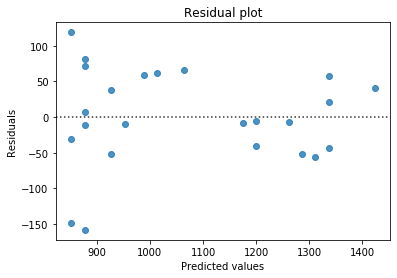

In [26]:
# seaborn residual plot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#sns.residplot(model.fittedvalues, df['Stock_Index_Price'], lowess=True, line_kws={'color':'r', 'lw':1})
sns.residplot(model.fittedvalues, df['Stock_Index_Price'], lowess=False)

plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals');